<a href="https://colab.research.google.com/github/day-ch/Word-Cloud/blob/main/COSINOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install CosinorPy 
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import os

     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 100 kB 10.4 MB/s 
  Created wheel for CosinorPy: filename=CosinorPy-2.1-py3-none-any.whl size=57208 sha256=e153c3946699e2b8fc7674b1108d6a9e7f3e137e17c2d7ebea9bf5f74f2fc3c7
  Stored in directory: /root/.cache/pip/wheels/51/57/ad/aa24f9d599d5ffa693dfd1cbfc118378f98dfe6ef568790fc0
Successfully built CosinorPy


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/189p3BtAh4ER5rpyxeVgFB5Rq8Ew5pLoC/edit?usp=drivesdk&ouid=107328004973663065199&rtpof=true&sd=true'
  
import pandas as pd 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Cópia de CosinorPY.xlsx')   
  
df = pd.read_excel('Cópia de CosinorPY.xlsx') 
print(df)

          1.0    4.0
0         2.0   14.0
1         3.0  588.0
2         4.0    3.0
3         5.0  276.0
4         6.0   38.0
...       ...    ...
21595  1437.0   13.0
21596  1438.0    7.0
21597  1439.0   38.0
21598  1440.0  646.0
21599     NaN    0.0

[21600 rows x 2 columns]


In [ ]:
path = "caminho copiado"
df = file_parser.read_excel('Cópia de CosinorPY.xlsx')

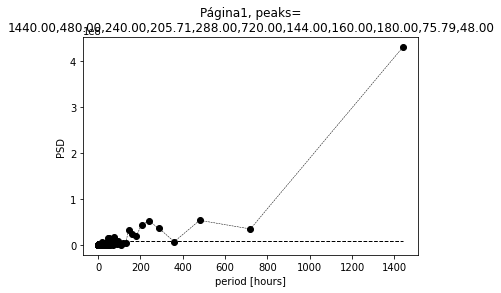

In [ ]:
cosinor.periodogram_df(df, max_per = 1440)

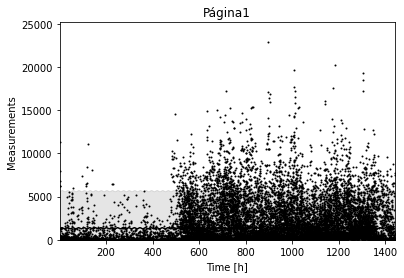

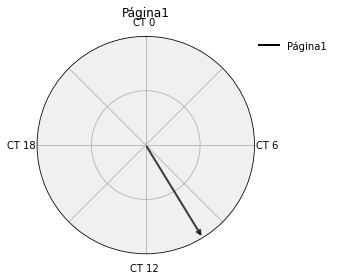

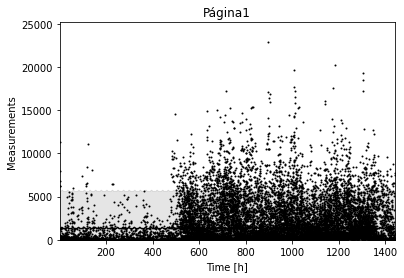

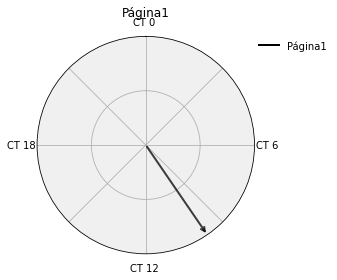

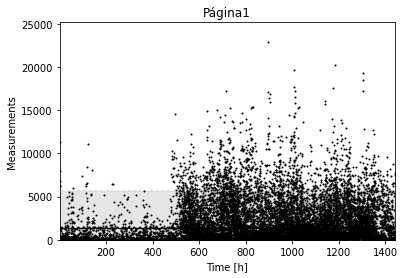

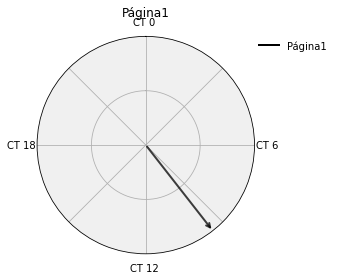

In [ ]:
df_results = cosinor.fit_group(df, n_components = [1,2,3], period=24)

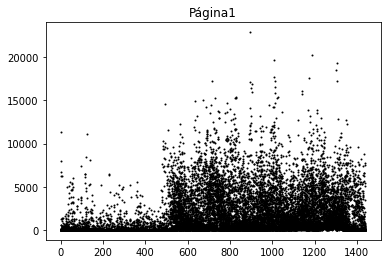

In [ ]:
cosinor.plot_data(df)

In [ ]:
df_best_models = cosinor.get_best_models(df, df_results, n_components = [1,2,3])

In [ ]:
df_best_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,Página1,24.0,1.0,0.010323,0.026259,0.97929,0.993436,1.067987e+11,0.000423,0.000331,-197117.711221,64.721924,-2.591264,1335.453566,[9.897897897897899],[1400.1754895063973],[21.90990990990991],[1270.7328340031092],4358.716981,2223.751425


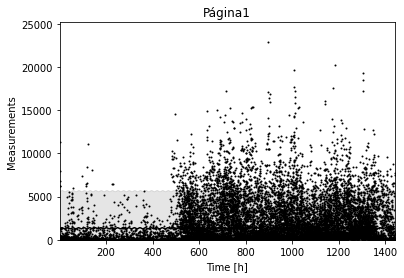

In [ ]:
cosinor.plot_df_models(df, df_best_models,plot_phase=False)

In [ ]:
df_results_extended= cosinor.analyse_best_models(df, df_best_models)

In [ ]:
df_results_extended[['test', 'amplitude', 'q(amplitude)', 'acrophase', 'q(acrophase)']]

,test,amplitude,q(amplitude),acrophase,q(acrophase)
0,Página1,64.721924,0.000915,-2.591264,6.787904e-13
